<a href="https://colab.research.google.com/github/Zurezh/Python_LearnByDoing/blob/master/Module_6_Advanced_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 - Advanced Visualization

1. Category Data Type
2. JointPlots
3. Histograms
4. Staked Histograms
5. KDE Plot
6. Subplots()
7. Violinplots vs Boxplots
8. Faced Grid
9. Coordinates and Diagonals
10. Building Dashboard in Python
11. Styling Tips
12. Finishing Touches
13. Exercise

## Category Datatype

In [0]:
import pandas as pd

In [0]:
movies = pd.read_csv('https://raw.githubusercontent.com/Zurezh/Python_LearnByDoing/master/P4-Movie-Ratings.csv')

In [0]:
len(movies)

559

In [0]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [0]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [0]:
# Renaming Columns
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillions', 'Year']

In [0]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [0]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [0]:
movies.describe()
# Year is more of category rather than a number
# In reality, Mean and Std of Year doesn't make sense

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [0]:
# Change the column in category data
movies.Film = movies.Film.astype('category')

In [0]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [0]:
# Change the column in category data
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [0]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [0]:
# Quick way to find unique values for categories
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [0]:
movies.describe()
# Year is not displayed as we changed to the Category Data

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


## JointPlots

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

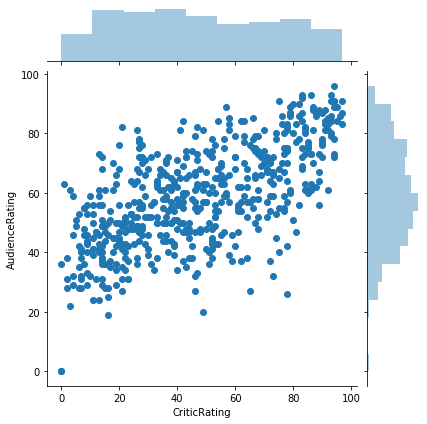

In [0]:
# JointPlots
j = sns.jointplot(data = movies, x = 'CriticRating',y = 'AudienceRating')

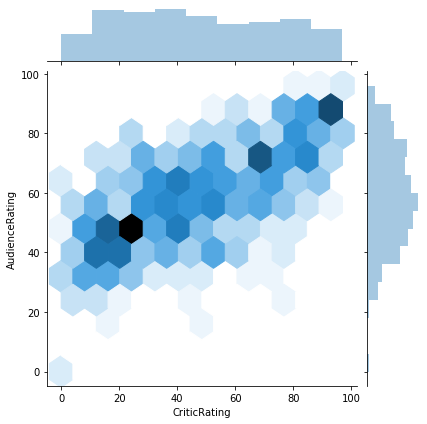

In [0]:
# Adding few parameters
j = sns.jointplot(data = movies, x = 'CriticRating',y = 'AudienceRating', kind='hex')

In [0]:
# Chart 1


## Histograms

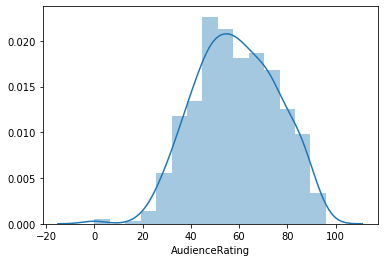

In [0]:
# Using Seaborn
m1 = sns.distplot(movies.AudienceRating,bins=15)

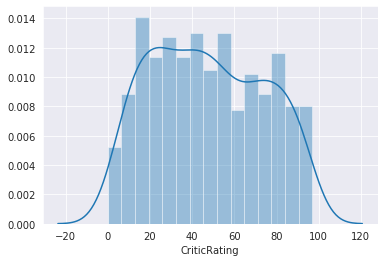

In [0]:
m2 = sns.distplot(movies.CriticRating,bins=15)

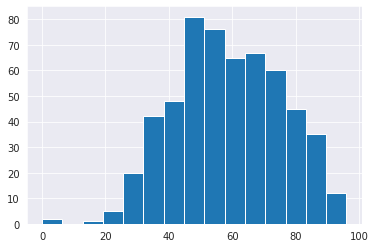

In [0]:
# Using Pyplot
sns.set_style('darkgrid') # sns.set_style('white')
n1 = plt.hist(movies.AudienceRating,bins=15)

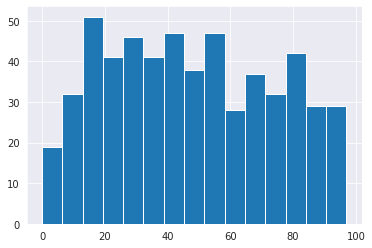

In [0]:
n2 = plt.hist(movies.CriticRating,bins=15)

## Staked Histograms

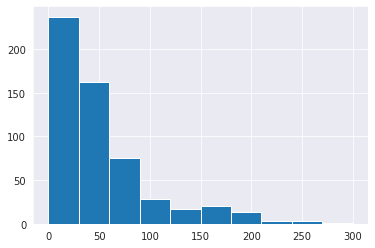

In [0]:
plt.hist(movies.BudgetMillions)
plt.show()

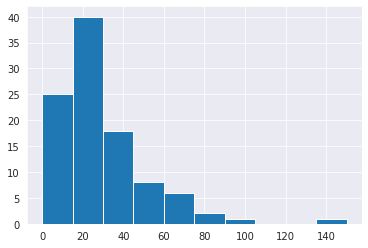

In [0]:
# Filter the dataset
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.show()

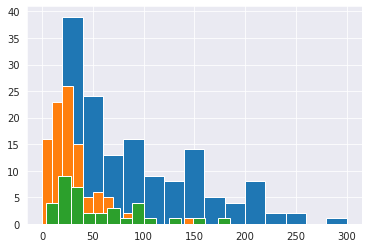

In [0]:
# Filter the dataset
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 15)
plt.show()

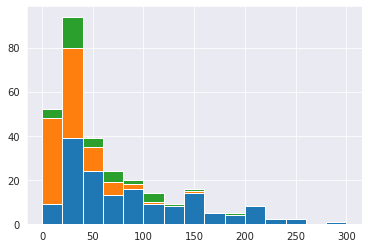

In [0]:
# Stake the histogram
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, \
          movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Thriller'].BudgetMillions], \
         bins = 15, stacked = True)
plt.show()

In [0]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [0]:
# Optimized for Genres
for gen in movies.Genre.cat.categories:
  print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


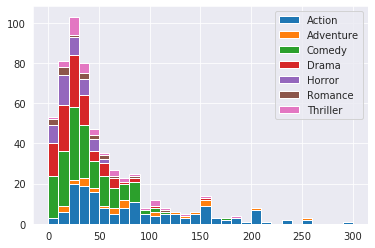

In [0]:
# Optimized for Genres

list1 = []
myLabels = []

for gen in movies.Genre.cat.categories:
  list1.append(movies[movies.Genre == gen].BudgetMillions)
  myLabels.append(gen)

h = plt.hist(list1,bins=30,stacked=True,rwidth=1,label=myLabels)
plt.legend()
plt.show()

## KDE Plot

In [0]:
# Kernel Density Estimate Plot

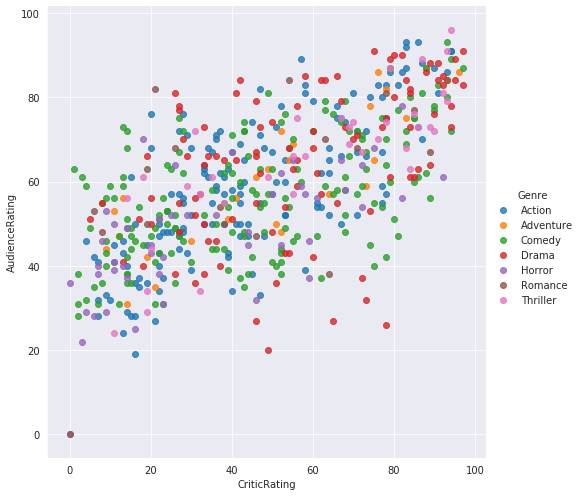

In [0]:
vis1 = sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',\
                  fit_reg=False,hue='Genre', \
                  size=7,aspect = 1)

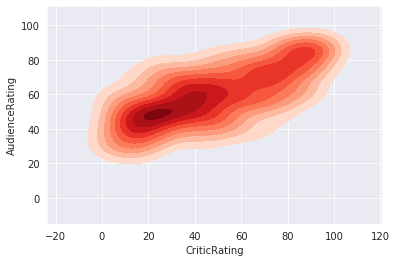

In [0]:
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, \
                 shade = True,shade_lowest=False,cmap = 'Reds')

#Tip:
#k1b = sns.kdeplot(movies.CriticRating,movies.AudienceRating, cmap = 'Reds')

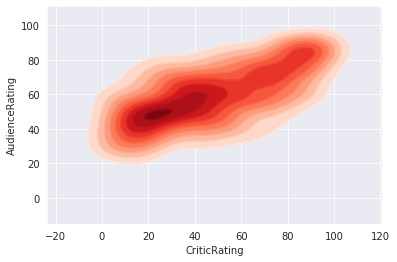

In [0]:
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, \
                 shade = True,shade_lowest=False,cmap = 'Reds')

#Tip:
k1b = sns.kdeplot(movies.CriticRating,movies.AudienceRating, cmap = 'Reds')

## Working with Subplots

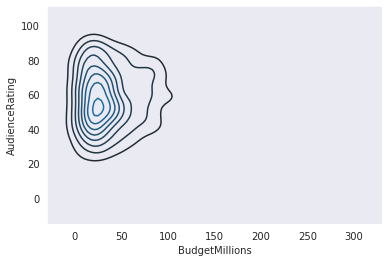

In [0]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating)

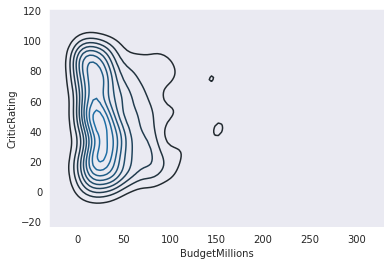

In [0]:
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating)

[(-20, 160)]

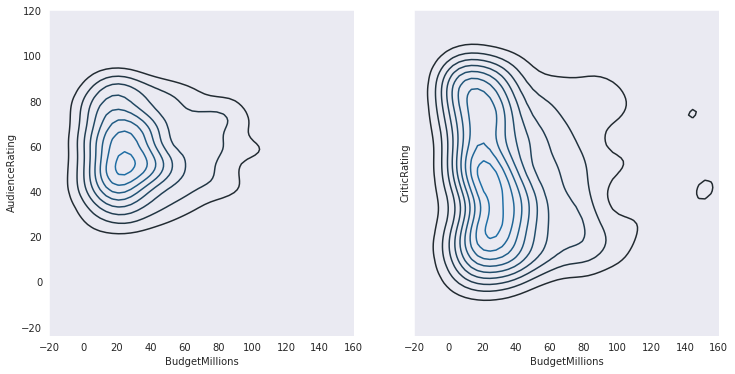

In [0]:
f, axes = plt.subplots(1,2,figsize=(12,6), sharex = True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[1])
k1.set(xlim=(-20,160))

## ViolinPlots vs BoxPlots

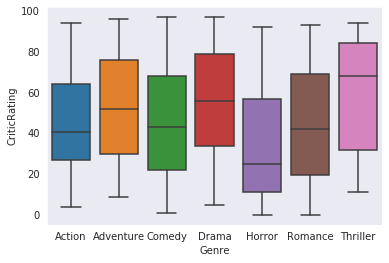

In [0]:
# BoxPlot
z = sns.boxplot(data=movies,x='Genre',y='CriticRating')

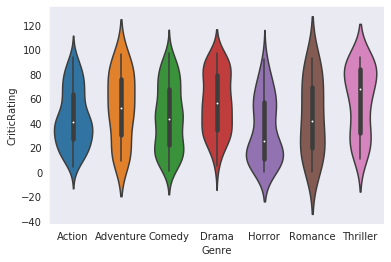

In [0]:
# ViolinPlots
z = sns.violinplot(data=movies,x='Genre',y='CriticRating')

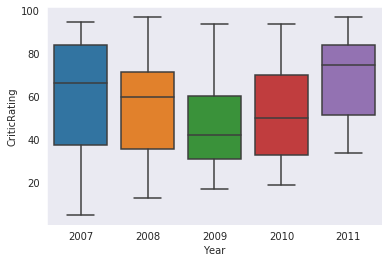

In [0]:
z = sns.boxplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticRating')

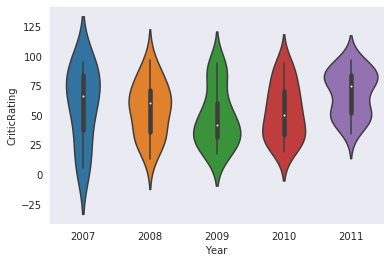

In [0]:
z = sns.violinplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticRating')

## Facet Grids

In [0]:
#g = sns.FacetGrid(movies,row='Genre',hue='Genre')
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')

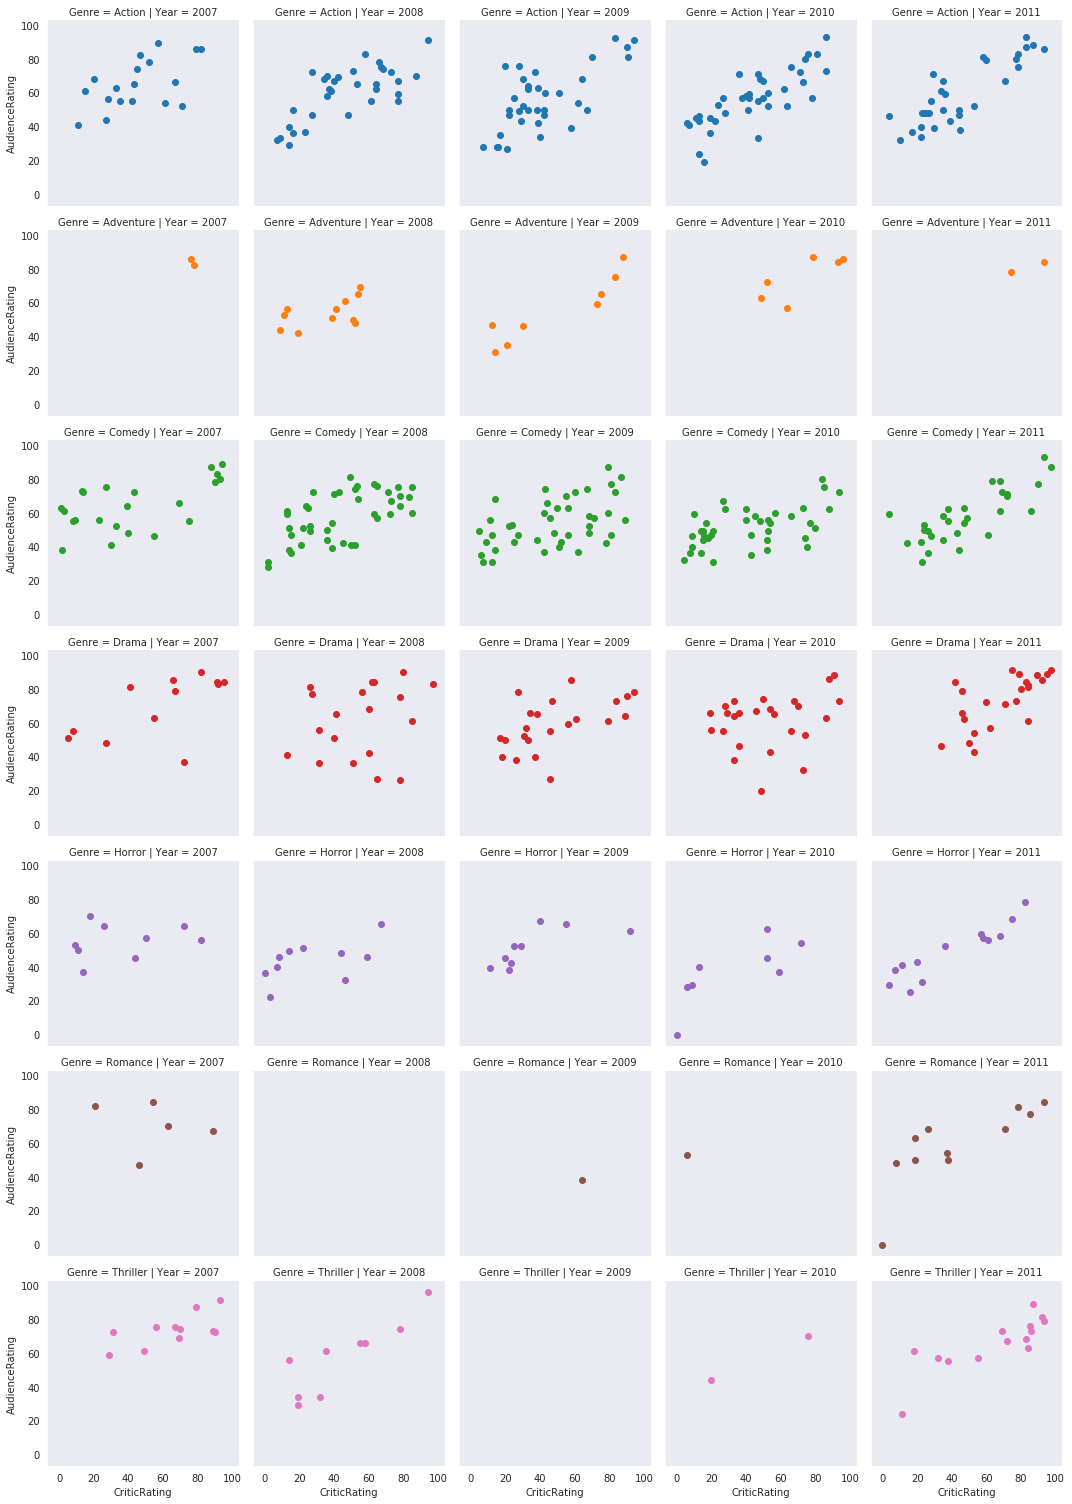

In [0]:
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
g = g.map(plt.scatter,'CriticRating','AudienceRating')

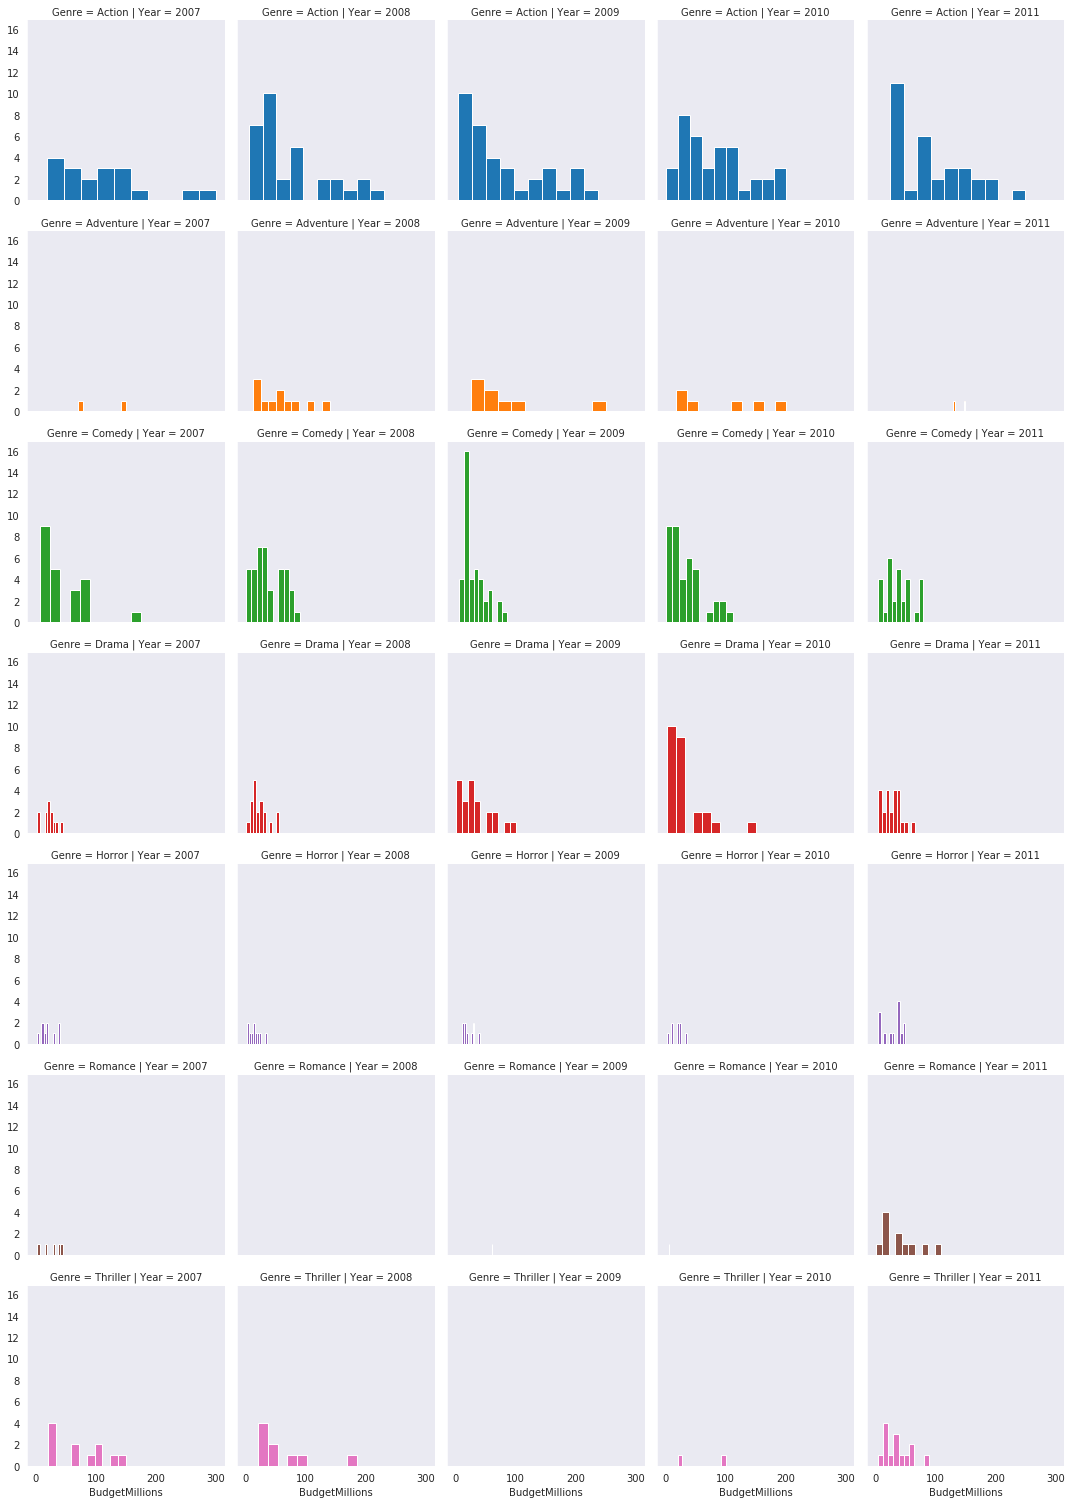

In [0]:
# can populate with any type of chart: Example Histogram
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
g = g.map(plt.hist,'BudgetMillions')

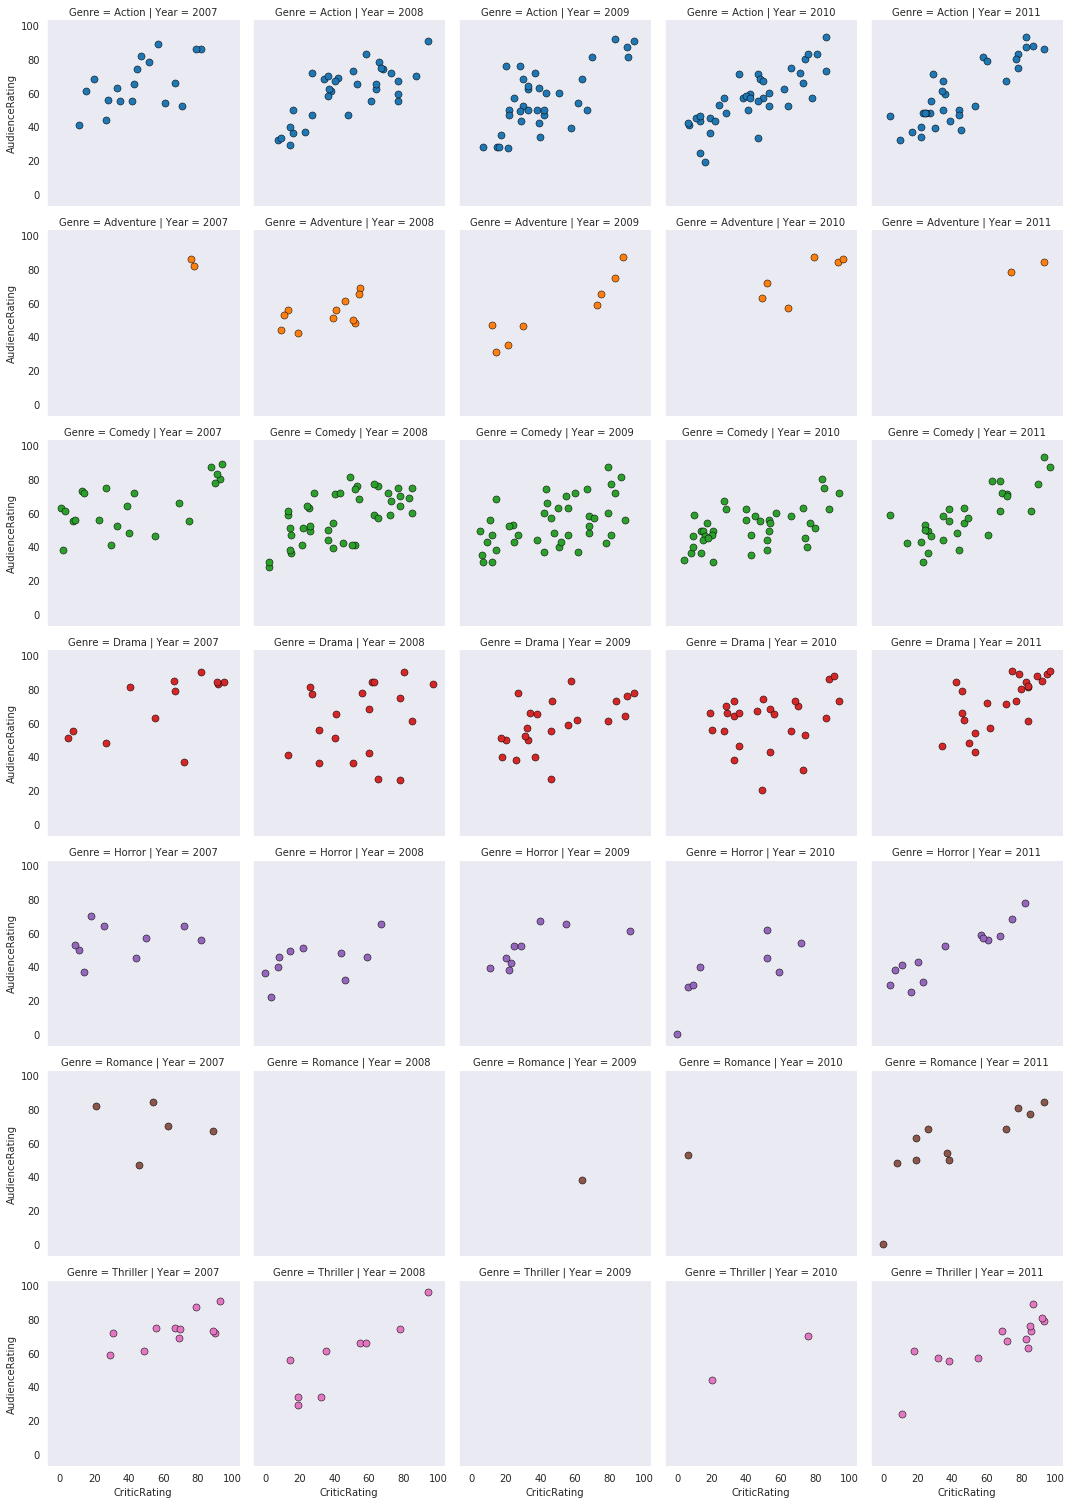

In [0]:
#back to scatterplots
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter,'CriticRating','AudienceRating',**kws)


## Coordinates and Diagonals

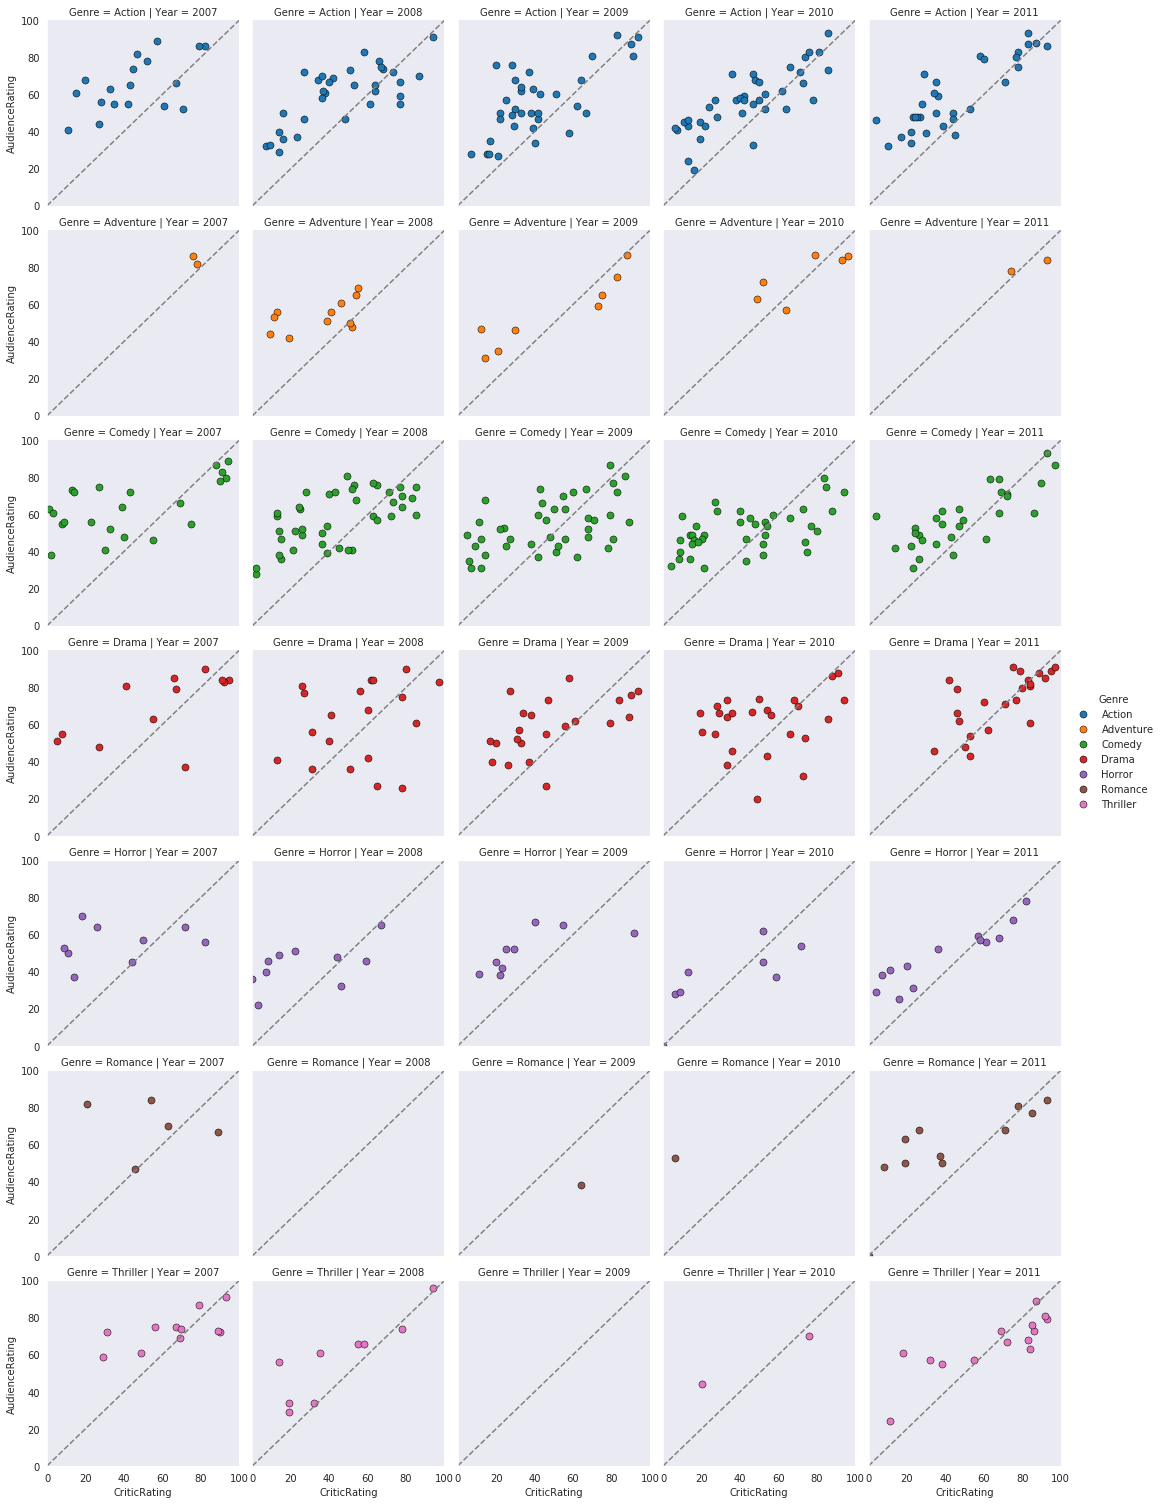

In [0]:
# Controlling Axes and Adding Diagonals
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter,'CriticRating','AudienceRating',**kws)
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
  ax.plot((0,100),(0,100),c='gray',ls='--')
g.add_legend()

## Building Dashboard

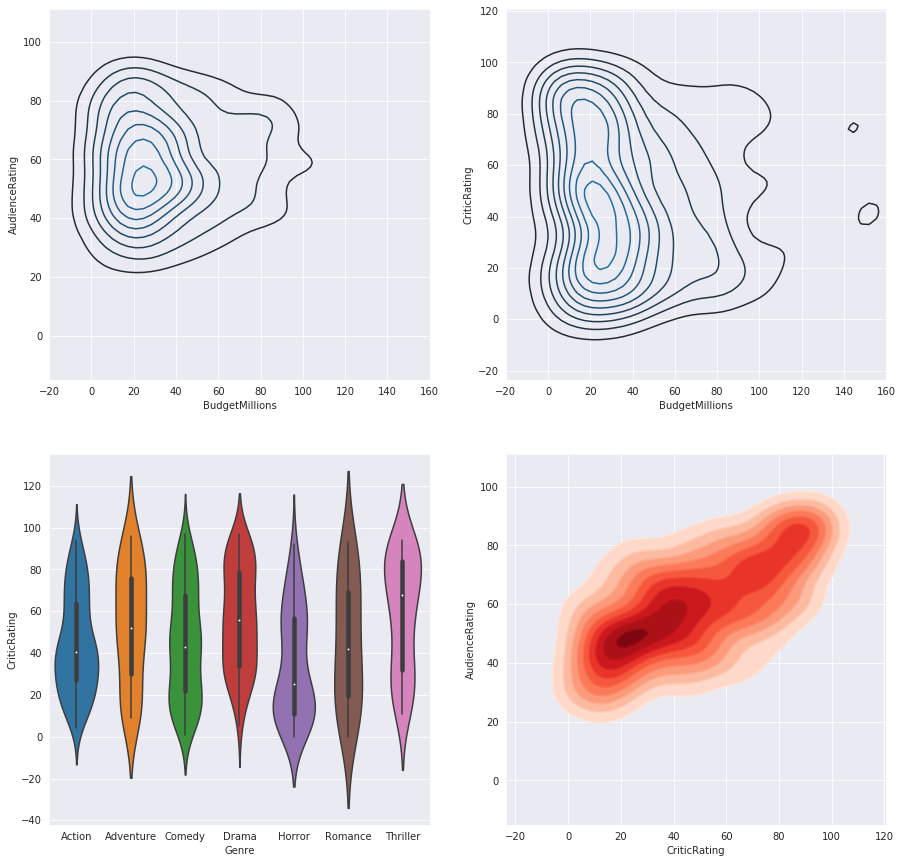

In [0]:
# Seaborn Plots Only
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2,figsize=(15,15))

k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[0,1])
z = sns.violinplot(data=movies,x='Genre',y='CriticRating',ax=axes[1,0])
k4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, shade = True,shade_lowest=False,cmap = 'Reds', ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating,movies.AudienceRating, cmap = 'Reds', ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

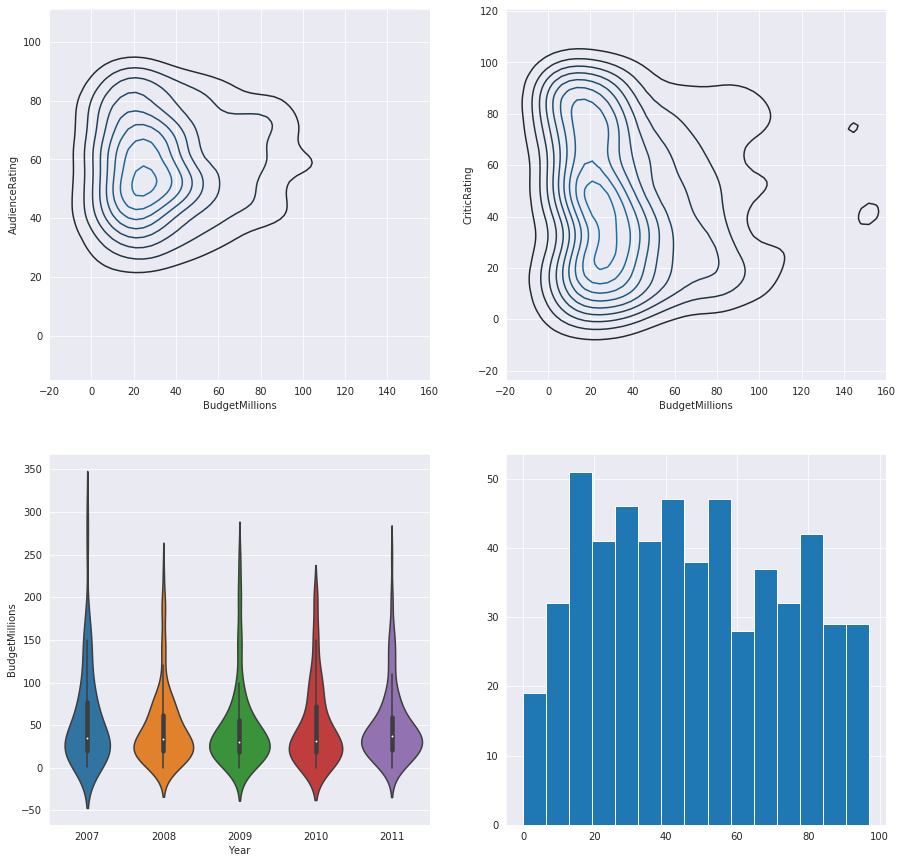

In [0]:
# Seaborn Plots + MatlabPlot 
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2,figsize=(15,15))

k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[0,1])
z = sns.violinplot(data=movies,x='Year',y='BudgetMillions',ax=axes[1,0])
axes[1,1].hist(movies.CriticRating,bins=15)

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

## Styling Tips

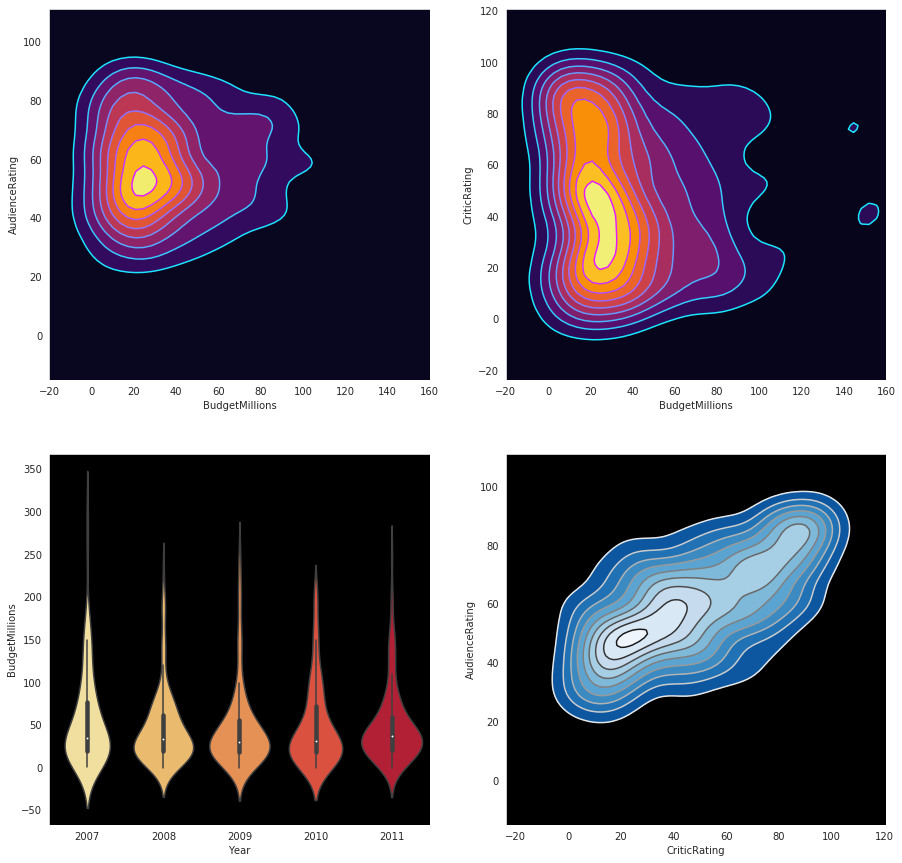

In [0]:
# Seaborn Plots Only
sns.set_style('dark',{'axes.facecolor':'black'}) #white, whitegrid, dark, darkgrid, tick
f, axes = plt.subplots(2,2,figsize=(15,15))

# Plot 0,0
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,
                 shade=True, shade_lowest=True, cmap='inferno',
                 ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,
                  cmap='cool', ax=axes[0,0])

# Plot 0,1
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,
                 shade=True, shade_lowest=True, cmap='inferno',
                 ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,
                cmap='cool', ax=axes[0,1])

# Plot 1,0
z = sns.violinplot(data=movies,x='Year',y='BudgetMillions',
                   palette='YlOrRd',ax=axes[1,0])

# Plot 1,1
k4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, 
                 shade = True,shade_lowest=False,cmap = 'Blues_r', 
                 ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating,movies.AudienceRating, 
                  cmap = 'gist_gray_r', ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

## Finishing Touches

In [0]:
#Themetic Edits

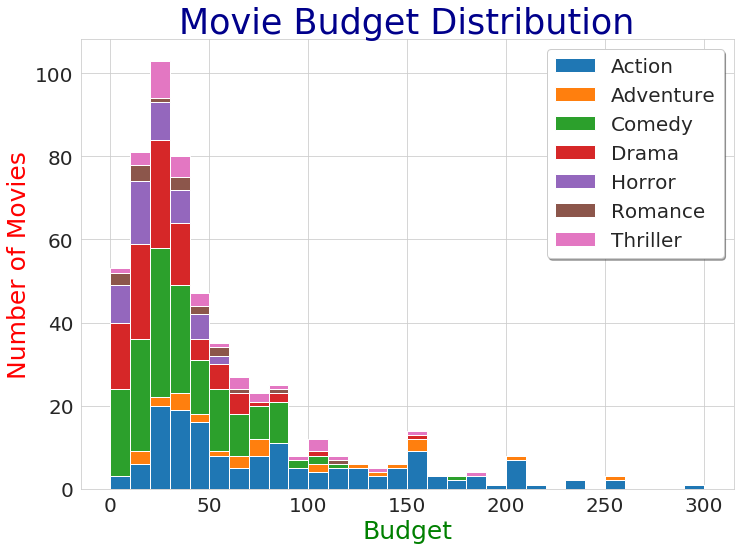

In [0]:
list1 = []
myLabels = []

for gen in movies.Genre.cat.categories:
  list1.append(movies[movies.Genre == gen].BudgetMillions)
  myLabels.append(gen)

sns.set_style('whitegrid')

# Handy Trick to resize the plots
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27) #Size of A4 paper

h = plt.hist(list1,bins=30,stacked=True,rwidth=1,label=myLabels)
plt.title('Movie Budget Distribution',fontsize=35,
          color='DarkBlue', fontname='DejaVu Sans')

plt.ylabel('Number of Movies',fontsize=25, color='Red')
plt.xlabel('Budget',fontsize=25, color='Green')

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.legend(frameon=True,fancybox=True,
           shadow=True,framealpha=1,prop={'size':20})
plt.show()

## Exercise

#### Movie % Domestic Gross

The previous consultant had created a chart for them which is illustrated on the next slide. However the Python code used to create the diagram has since been lost and cannot be recovered. Your taks is to come up with the code that will re-create the same chart making it look as close as possible to original

The new dataset has been supplied

Dataset
https://raw.githubusercontent.com/Zurezh/Python_LearnByDoing/master/P4-Section6-Homework-Dataset.csv

Chart Type: BoxPlot 
Chart Name: Domestic Gross % by Genre



#### Solution

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
mov = pd.read_csv('https://raw.githubusercontent.com/Zurezh/Python_LearnByDoing/master/P4-Section6-Homework-Dataset.csv',encoding='latin1')

In [9]:
mov.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [10]:
mov.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [11]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

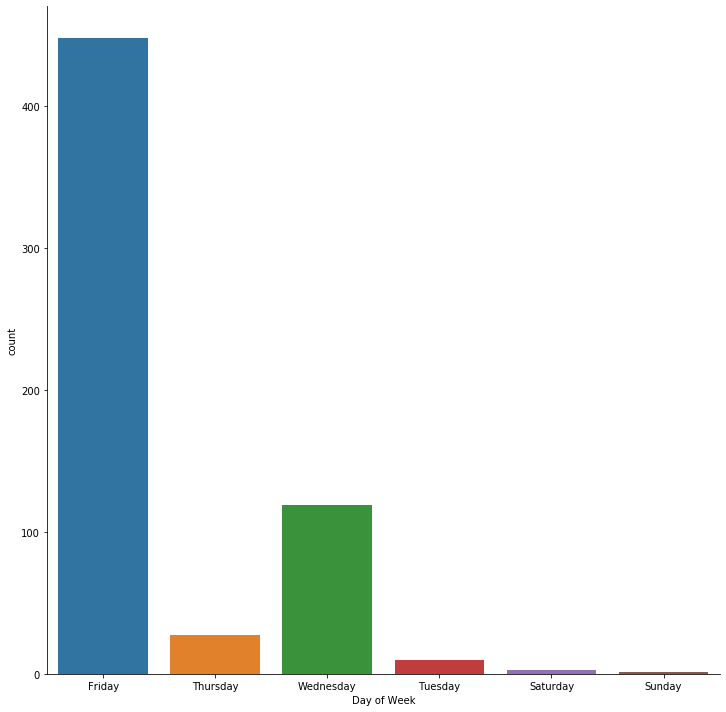

In [12]:
vis1 = sns.factorplot(data=mov,x='Day of Week',kind='count',size=10)

In [14]:
mov.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [15]:
len(mov.Studio.unique())

36

In [16]:
mov.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [17]:
len(mov.Genre.unique())

15

In [0]:
genre_filters = ['action','adventure','animation','comedy','drama']
mov2 = mov[mov.Genre.isin(genre_filters)]

In [23]:
mov2.Genre.unique()

array(['action', 'comedy', 'adventure', 'animation', 'drama'],
      dtype=object)

In [0]:
studio_filters = ['Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB']
mov3 = mov2[mov2.Studio.isin(studio_filters)]

In [25]:
print(mov3.Studio.unique())

['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']


In [26]:
len(mov3)

423

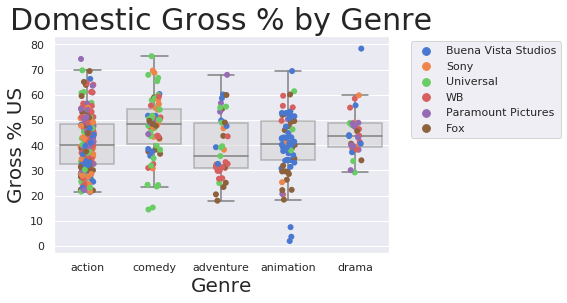

In [36]:
sns.set(style='darkgrid',palette='muted',color_codes=True)

ax = sns.boxplot(data=mov3,x='Genre',y='Gross % US',orient = 'v',color='lightgray',showfliers = False)
plt.setp(ax.artists,alpha=0.5)

sns.stripplot(x='Genre',y='Gross % US',data=mov3,jitter=True,size=6,linewidth=0,hue='Studio')

ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)

ax.legend(bbox_to_anchor=(1.05,1),loc=2)